# Project Notebook 
This notebook is going to be utilized for my midterm/final project. My project research question is, how does educational attainment impact povety levels across different demographic groups? My theory is communities that have higher educational attainment will also have higher income. Communities with lower educational attainment will have lower incomes, many in poverty levels. My theory also indicates nonwhite residents will have lower educational attainment, hence lower income. The implications of specific demographic groups having less accessibility to educational opportunities creating a devasting cycle of poverty can allow for clear recommendations in resources for fair accessibility.





In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [23]:
!pip install mapclassify

In [21]:
censustracts=gpd.read_file('LACountyTracts24.zip')

In [22]:
censustracts.head()

,ID,NAME,STATE_NAME,ST_ABBREV,AREA,TOTPOP_CY,HHPOP_CY,GQPOP_CY,POPDENS_CY,TOTHH_CY,...,NHSPWHT__1,NHSPBLK__1,NHSPAI_CY_,NHSPASN__1,NHSPPI_CY_,NHSPOTH__1,NHSPMLT__1,HSGRAD_LES,BACHDEG_PL,geometry
0,06037262302,060372623.02,California,CA,1.182838,2782,2765,17,2352.0,1141,...,79.295471,1.042416,0.000000,6.506111,0.000000,1.006470,5.140187,0.824043,83.131362,"POLYGON ((-13187629.788 4038588.873, -13187642..."
1,06037206201,060372062.01,California,CA,0.077543,2863,2202,661,36941.9,1262,...,20.852253,16.590988,1.012924,28.815927,0.419141,0.838282,4.680405,9.677419,45.822994,"POLYGON ((-13162511.881 4035572.196, -13162582..."
2,06037128102,060371281.02,California,CA,0.250507,4755,4521,234,18982.0,1479,...,18.401682,5.005258,0.042061,5.615142,0.147213,0.672976,1.451104,25.774135,17.941712,"POLYGON ((-13184678.486 4053894.2, -13184921.4..."
3,06037131701,060371317.01,California,CA,0.254699,4591,4575,16,18025.1,1741,...,23.175779,5.968199,0.174254,21.367894,0.043563,0.588107,3.724679,17.841079,34.002999,"POLYGON ((-13197317.144 4055820.492, -13197556..."
4,06037232800,060372328.00,California,CA,0.164729,3927,3858,69,23843.4,968,...,0.993125,12.554113,0.254647,0.611154,0.000000,0.891266,1.120448,43.775763,10.634790,"POLYGON ((-13166681.241 4028231.101, -13166681..."


In [24]:
# columns to keep 
columns_to_keep = ['ID','HISPPOP_CY', 'NHSPWHT_CY', 'NHSPBLK_CY', 'NHSPAI_CY', 'NHSPASN_CY', 'DIVINDX_CY', 'NOHS_CY','SOMEHS_CY', 'HSGRAD_CY', 'GED_CY', 'SMCOLL_CY', 'ASSCDEG_CY', 'BACHDEG_CY', 'GRADDEG_CY', 'EDUCBASECY', 'HINC0_CY', 'HINC15_CY', 'HINC25_CY', 'HINC35_CY', 'HINC50_CY', 'HINC75_CY', 'HINC100_CY', 'HINC150_CY', 'HINC200_CY','geometry']

In [26]:
# creating a new dataframe with the columns i want to keep 
tractsCleaned = censustracts[columns_to_keep]

In [30]:
tractsCleaned.columns = ['FIPS', 'HISPANIC', 'WHITE', 'BLACK', 'AMERICAN INDIAN', 'ASIAN', 'DIVERSITY', 'NOHS', 'SOMEHS', 'HSGRAD', 'GED', 'SOMECOLL', 'ASSDEG', 'BACH', 'GRAD', 'EDUCBASE', 'LESS15', '15-24', '25-34', '35-49', '50-74', '75-99', '100-149', '150-199', '200MORE', 'geometry']

In [31]:
tractsCleaned.head()

,FIPS,HISPANIC,WHITE,BLACK,AMERICAN INDIAN,ASIAN,DIVERSITY,NOHS,SOMEHS,HSGRAD,...,LESS15,15-24,25-34,35-49,50-74,75-99,100-149,150-199,200MORE,geometry
0,06037262302,195,2206,29,29,0,181,41.7,0,62,...,100,0,55,16,34,56,136,84,660,"POLYGON ((-13187629.788 4038588.873, -13187642..."
1,06037206201,767,597,475,475,29,825,87.0,211,367,...,347,173,67,124,68,83,138,171,91,"POLYGON ((-13162511.881 4035572.196, -13162582..."
2,06037128102,3265,875,238,238,2,267,82.8,243,915,...,73,156,143,227,319,194,249,88,30,"POLYGON ((-13184678.486 4053894.2, -13184921.4..."
3,06037131701,2064,1064,274,274,8,981,88.5,286,747,...,104,138,101,113,217,203,398,138,329,"POLYGON ((-13197317.144 4055820.492, -13197556..."
4,06037232800,3282,39,493,493,10,24,71.7,265,572,...,170,138,100,77,87,101,154,80,61,"POLYGON ((-13166681.241 4028231.101, -13166681..."


In [32]:
tractsCleaned.type

0            Polygon
1            Polygon
2            Polygon
3            Polygon
4            Polygon
            ...     
2528    MultiPolygon
2529         Polygon
2530         Polygon
2531         Polygon
2532    MultiPolygon
Length: 2533, dtype: object

<Axes: >

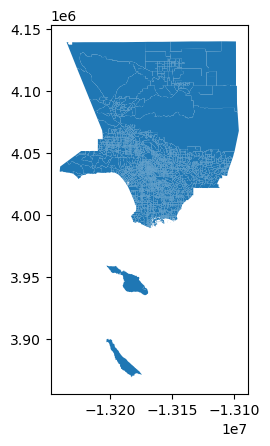

In [33]:
tractsCleaned.plot()

In [42]:
tractsCleaned.describe()

,HISPANIC,WHITE,BLACK,AMERICAN INDIAN,ASIAN,DIVERSITY,NOHS,SOMEHS,HSGRAD,GED,...,EDUCBASE,LESS15,15-24,25-34,35-49,50-74,75-99,100-149,150-199,200MORE
count,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,...,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000
mean,1912.333597,959.699171,287.457560,287.457560,7.103829,598.900908,75.357442,194.931307,531.593762,58.018950,...,2792.352941,122.585077,80.701145,81.739834,115.664430,189.564153,168.043822,240.512041,146.752862,234.399131
std,1321.468980,986.664479,456.497764,456.497764,6.872504,725.789841,12.080802,161.133130,301.745829,51.187861,...,1010.214120,103.182232,58.730436,52.964665,69.562509,97.979745,89.246322,134.776600,104.201923,245.669171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,785.000000,171.000000,55.000000,55.000000,3.000000,147.000000,68.400000,65.000000,308.000000,19.000000,...,2132.000000,55.000000,37.000000,43.000000,65.000000,121.000000,109.000000,149.000000,74.000000,61.000000
50%,1713.000000,585.000000,130.000000,130.000000,5.000000,366.000000,79.100000,162.000000,501.000000,47.000000,...,2704.000000,97.000000,70.000000,72.000000,106.000000,174.000000,154.000000,219.000000,128.000000,152.000000
75%,2807.000000,1501.000000,304.000000,304.000000,10.000000,733.000000,84.600000,289.000000,716.000000,83.000000,...,3383.000000,161.000000,108.000000,111.000000,156.000000,244.000000,214.000000,313.000000,200.000000,333.000000
max,7303.000000,8753.000000,4690.000000,4690.000000,89.000000,5901.000000,90.100000,1534.000000,1987.000000,454.000000,...,11072.000000,1087.000000,499.000000,569.000000,549.000000,697.000000,763.000000,2017.000000,1069.000000,2569.000000


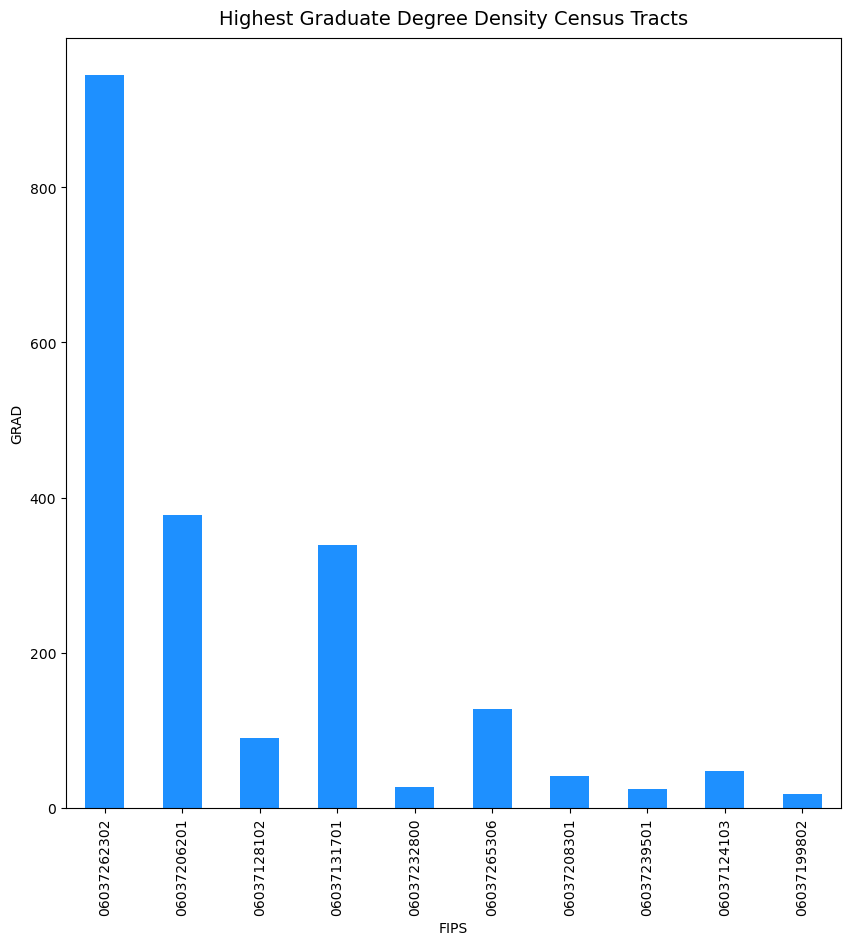

In [48]:
# top ten chart
fig, ax = plt.subplots(figsize=(10,10))

tractsCleaned[:10].plot.bar(ax = ax,
                       x = 'FIPS',
                       y= 'GRAD',
                       legend=False,
                       color='dodgerblue',
                      )

ax.set_xlabel('FIPS') # override x label
ax.set_ylabel('GRAD') # override y label
ax.set_title("Highest Graduate Degree Density Census Tracts",fontsize=14,pad=10); # multi-line title with padding
plt.savefig("firstTenCensusTracts.png", bbox_inches='tight')

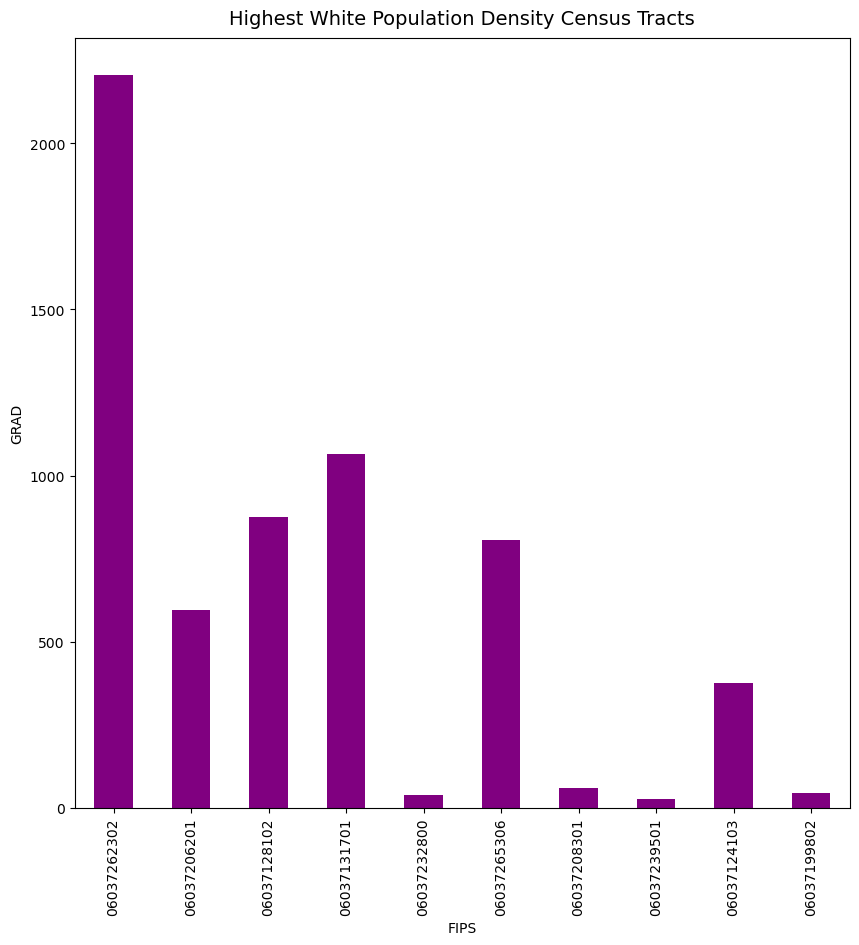

In [57]:
# top ten chart
fig, ax = plt.subplots(figsize=(10,10))

tractsCleaned[:10].plot.bar(ax = ax,
                       x = 'FIPS',
                       y= 'WHITE',
                       legend=False,
                       color='purple',
                      )

ax.set_xlabel('FIPS') # override x label
ax.set_ylabel('GRAD') # override y label
ax.set_title("Highest White Population Density Census Tracts",fontsize=14,pad=10); # multi-line title with padding
plt.savefig("WHITEPOP.png", bbox_inches='tight')

In [ ]:
# top ten chart
fig, ax = plt.subplots(figsize=(10,10))

tractsCleaned[:10].plot.bar(ax = ax, 
                       x = 'FIPS',
                       y= 'GRAD',
                       legend=False,
                       color='PURPLE',
                      )

ax.set_xlabel('FIPS') # override x label
ax.set_ylabel('WHITE') # override y label
ax.set_title("Highest White Population Density Census Tracts",fontsize=14,pad=10); # multi-line title with padding
plt.savefig("firstTenCensusTracts.png", bbox_inches='tight')

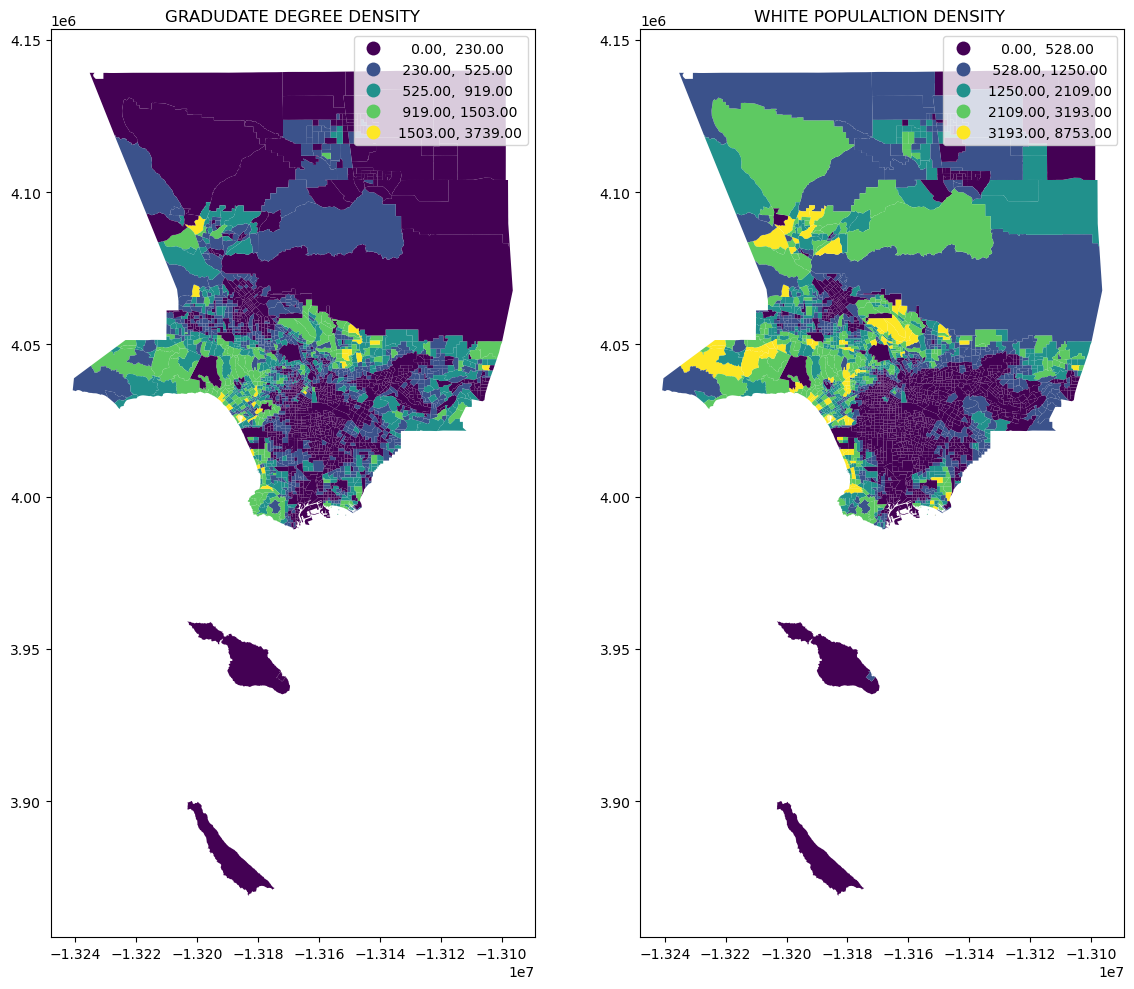

In [56]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Plot the first column on the first subplot
tractsCleaned.plot(column='GRAD', 
                  ax=axes[0],
                  legend=True, 
                  scheme='NaturalBreaks')
axes[0].set_title('GRADUDATE DEGREE DENSITY')

# Plot the second column on the second subplot
tractsCleaned.plot(column='WHITE', 
                  ax=axes[1],
                  legend=True, 
                  scheme='NaturalBreaks')
axes[1].set_title('WHITE POPULALTION DENSITY ')

# Adjust layout
plt.tight_layout()

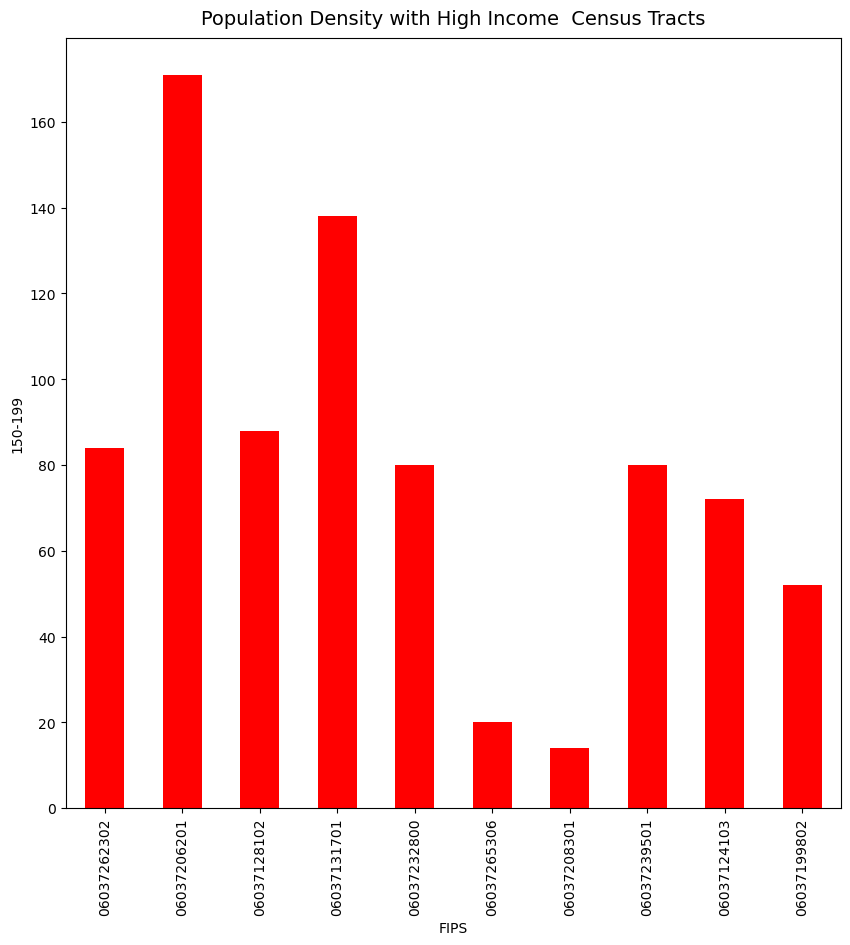

In [60]:
# top ten chart
fig, ax = plt.subplots(figsize=(10,10))

tractsCleaned[:10].plot.bar(ax = ax,
                       x = 'FIPS',
                       y= '150-199',
                       legend=False,
                       color='RED',
                      )

ax.set_xlabel('FIPS') # override x label
ax.set_ylabel('150-199') # override y label
ax.set_title("Population Density with High Income  Census Tracts",fontsize=14,pad=10); # multi-line title with padding
plt.savefig("TOP10150-199.png", bbox_inches='tight')

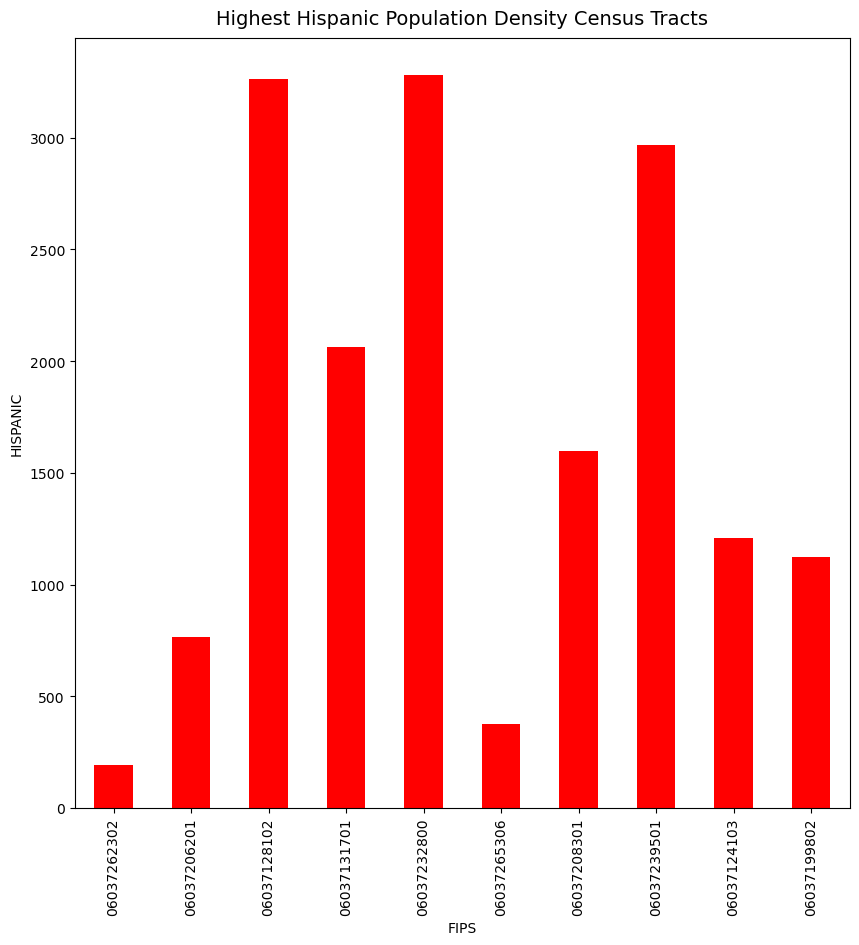

In [61]:
# top ten chart
fig, ax = plt.subplots(figsize=(10,10))

tractsCleaned[:10].plot.bar(ax = ax,
                       x = 'FIPS',
                       y= 'HISPANIC',
                       legend=False,
                       color='RED',
                      )

ax.set_xlabel('FIPS') # override x label
ax.set_ylabel('HISPANIC') # override y label
ax.set_title("Highest Hispanic Population Density Census Tracts",fontsize=14,pad=10); # multi-line title with padding
plt.savefig("HISPANICPOP.png", bbox_inches='tight')

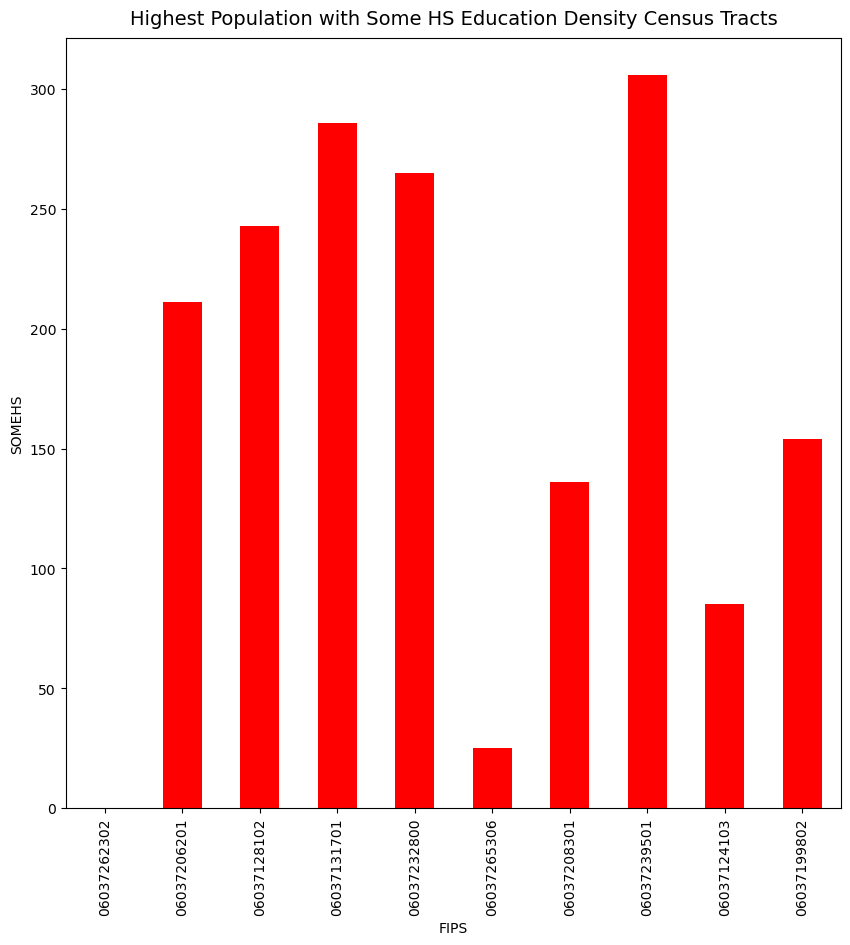

In [62]:
# top ten chart
fig, ax = plt.subplots(figsize=(10,10))

tractsCleaned[:10].plot.bar(ax = ax,
                       x = 'FIPS',
                       y= 'SOMEHS',
                       legend=False,
                       color='RED',
                      )

ax.set_xlabel('FIPS') # override x label
ax.set_ylabel('SOMEHS') # override y label
ax.set_title("Highest Population with Some HS Education Density Census Tracts",fontsize=14,pad=10); # multi-line title with padding
plt.savefig("SOMEHS.png", bbox_inches='tight')

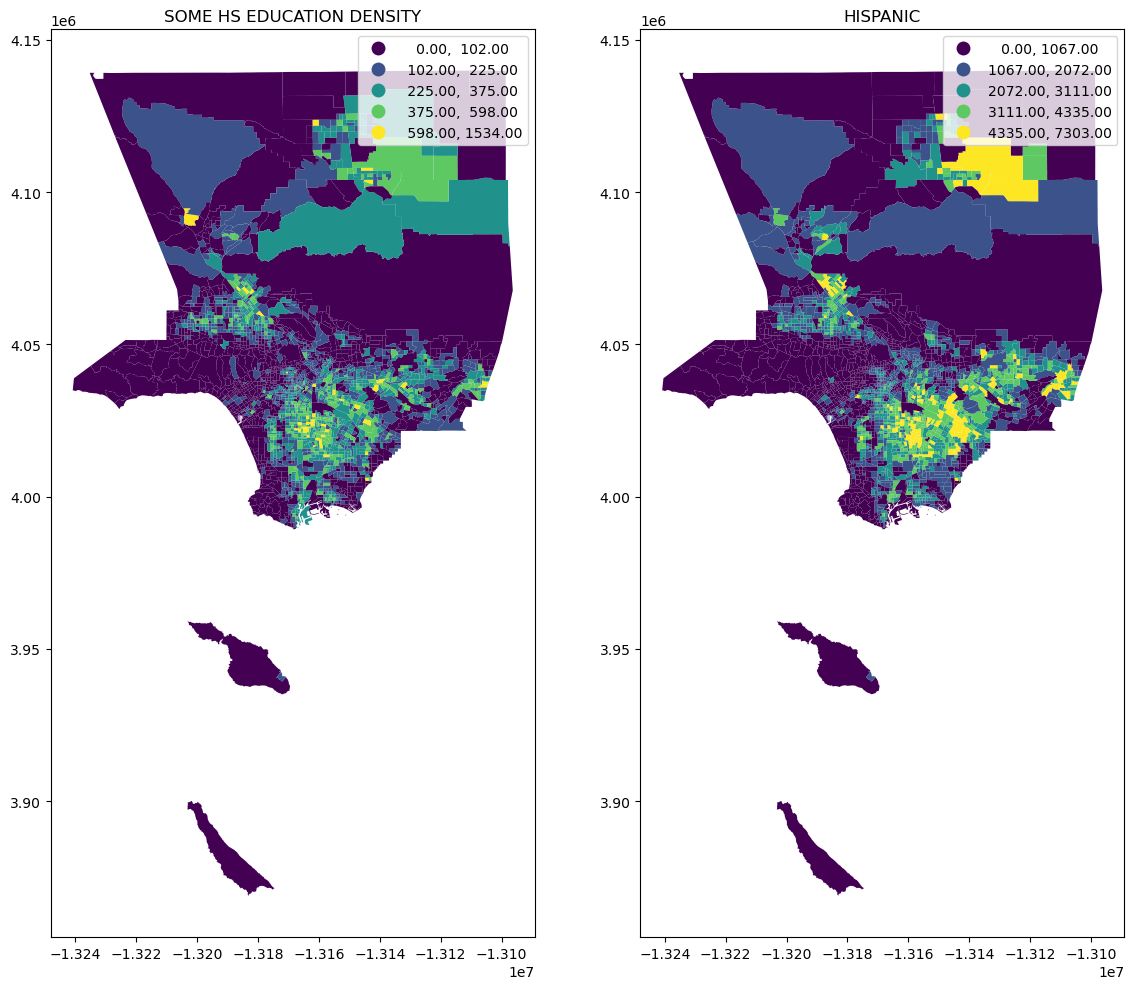

In [63]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Plot the first column on the first subplot
tractsCleaned.plot(column='SOMEHS', 
                  ax=axes[0],
                  legend=True, 
                  scheme='NaturalBreaks')
axes[0].set_title('SOME HS EDUCATION DENSITY')

# Plot the second column on the second subplot
tractsCleaned.plot(column='HISPANIC', 
                  ax=axes[1],
                  legend=True, 
                  scheme='NaturalBreaks')
axes[1].set_title('HISPANIC')

# Adjust layout
plt.tight_layout()

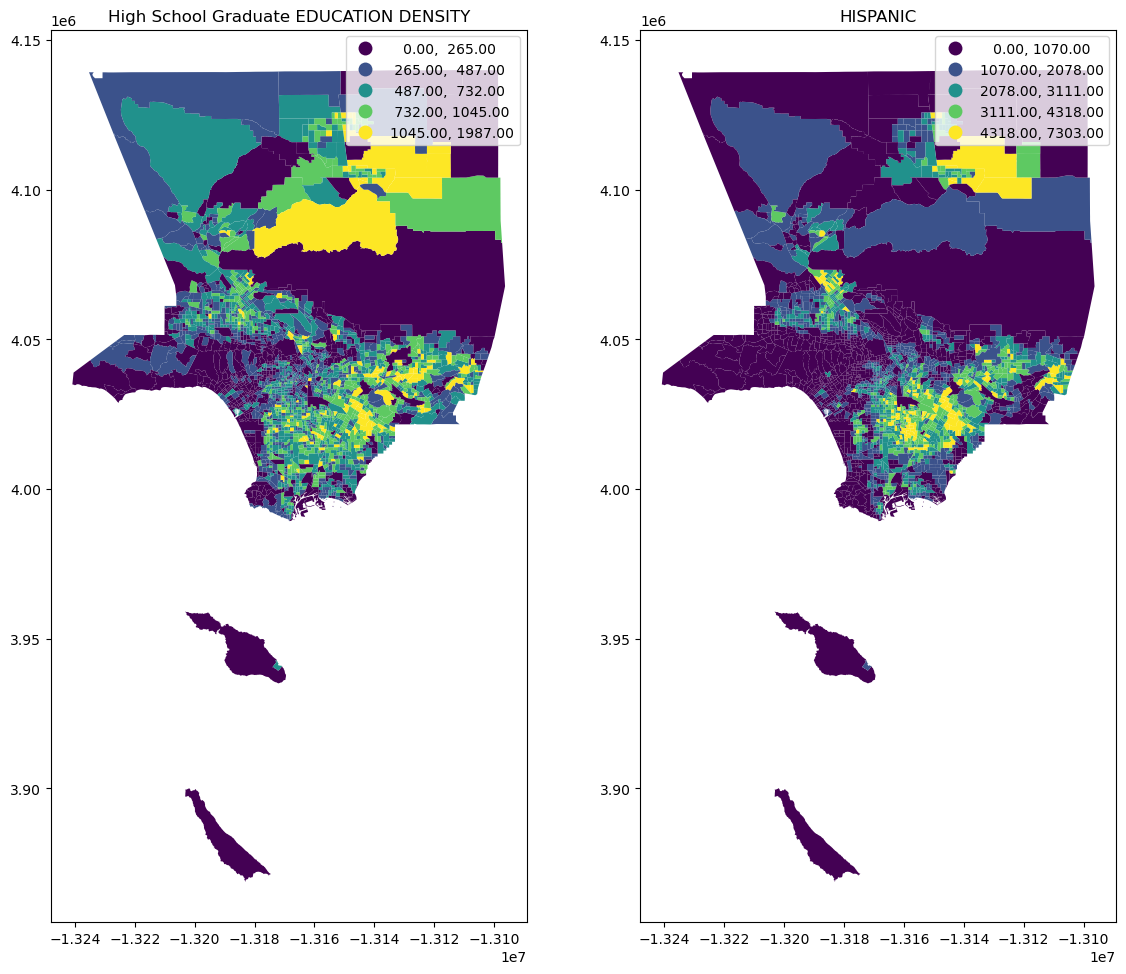

In [65]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Plot the first column on the first subplot
tractsCleaned.plot(column='HSGRAD', 
                  ax=axes[0],
                  legend=True, 
                  scheme='NaturalBreaks')
axes[0].set_title('High School Graduate EDUCATION DENSITY')

# Plot the second column on the second subplot
tractsCleaned.plot(column='HISPANIC', 
                  ax=axes[1],
                  legend=True, 
                  scheme='NaturalBreaks')
axes[1].set_title('HISPANIC')

# Adjust layout
plt.tight_layout()

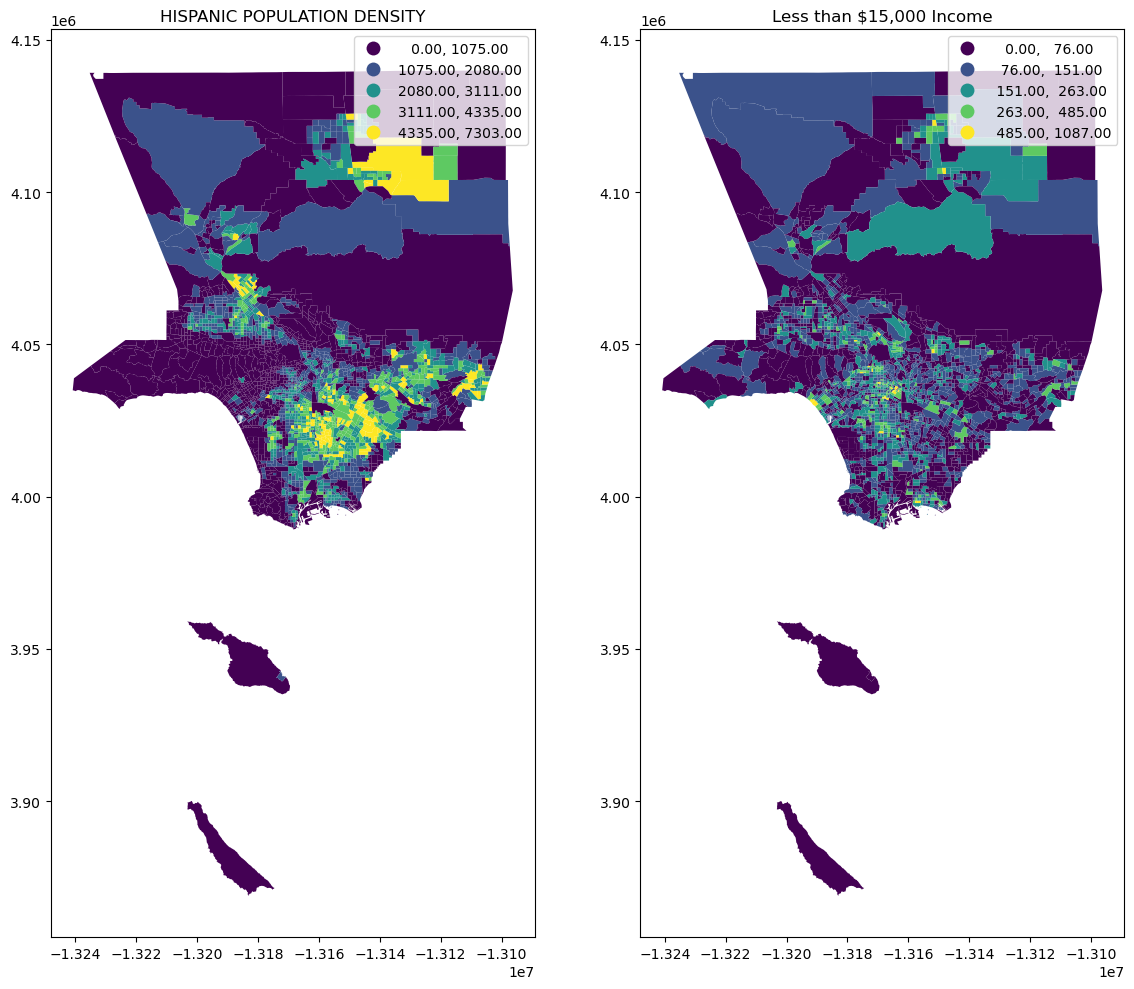

In [66]:

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Plot the first column on the first subplot
tractsCleaned.plot(column='HISPANIC', 
                  ax=axes[0],
                  legend=True, 
                  scheme='NaturalBreaks')
axes[0].set_title('HISPANIC POPULATION DENSITY')

# Plot the second column on the second subplot
tractsCleaned.plot(column='LESS15', 
                  ax=axes[1],
                  legend=True, 
                  scheme='NaturalBreaks')
axes[1].set_title('Less than $15,000 Income')

# Adjust layout
plt.tight_layout()

In [68]:
#the sum for each race and ethncity 
print(tractsCleaned['HISPANIC'].sum())
print(tractsCleaned['WHITE'].sum())
print(tractsCleaned['BLACK'].sum())
print(tractsCleaned['AMERICAN INDIAN'].sum())
print(tractsCleaned['ASIAN'].sum())


4843941
2430918
728130
728130
17994


In [ ]:
RaceDensity = RaceDensity=pd.DataFrame({'Race and Ethnicity':['White', 'Black', 'Asian', 'Hispanic or Latino'], 
                   'Population Count':[1378808, 430875, 543767, 2220293], 
                   'Color':['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']}) 
                                  
ax=racebar1.plot.bar(x='Race and Ethnicity', 
               y='Population Count', 
               title='Race and Ethnicity Population in the City of Los Angeles, 2019',
               color='red')

yticks = range(0, max(racebar1['Population Count']) + 100000, 100000)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{int(tick / 1)}' for tick in yticks])

plt.savefig('bar_chart1.png')